In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_path = 'archive/seg_train/'
test_path = 'archive/seg_test/'
pred_path = 'archive/seg_pred/'

print(f"Train path: {train_path}")
print(f"Test path: {test_path}")
print(f"Pred path: {pred_path}")


Train path: archive/seg_train/
Test path: archive/seg_test/
Pred path: archive/seg_pred/


In [6]:
code = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

def getcode(n):
    for x, y in code.items():
        if n == y:
            return x

x_train = []
y_train = []

for folder in os.listdir(os.path.join(train_path, 'seg_train')):
    folder_path = os.path.join(train_path, 'seg_train', folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    
    print(f"Reading {len(files)} images from folder: {folder}")
    
    for file in files:
        image = cv2.imread(file)
        if image is not None:
            image_array = cv2.resize(image, (100, 100)) 
            x_train.append(image_array)
            y_train.append(code[folder])
        else:
            print(f"Failed to read image: {file}")

print(f"Loaded {len(x_train)} images for training.")

x_test = []
y_test = []

for folder in os.listdir(os.path.join(test_path, 'seg_test')):
    folder_path = os.path.join(test_path, 'seg_test', folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    
    print(f"Reading {len(files)} images from folder: {folder}")
    
    for file in files:
        image = cv2.imread(file)
        if image is not None:
            image_array = cv2.resize(image, (100, 100)) 
            x_test.append(image_array)
            y_test.append(code[folder])
        else:
            print(f"Failed to read image: {file}")

print(f"Loaded {len(x_test)} images for testing.")


x_train = np.array(x_train, dtype='float32')
y_train = np.array(y_train, dtype='int32')
x_test = np.array(x_test, dtype='float32')
y_test = np.array(y_test, dtype='int32')

x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Reading 2271 images from folder: forest
Reading 2191 images from folder: buildings
Reading 2404 images from folder: glacier
Reading 2382 images from folder: street
Reading 2512 images from folder: mountain
Reading 2274 images from folder: sea
Loaded 14034 images for training.
Reading 474 images from folder: forest
Reading 437 images from folder: buildings
Reading 553 images from folder: glacier
Reading 501 images from folder: street
Reading 525 images from folder: mountain
Reading 510 images from folder: sea
Loaded 3000 images for testing.
x_train shape: (14034, 100, 100, 3)
y_train shape: (14034,)
x_test shape: (3000, 100, 100, 3)
y_test shape: (3000,)


In [4]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(2, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.Conv2D(150, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(4, 4),
    keras.layers.Conv2D(120, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(80, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(50, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(4, 4),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(6, activation='softmax')
])

KerasModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Model Details:')
print(KerasModel.summary())

Model Details:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 2)      │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 150)    │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 120)    │       162,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 80)     │        86,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 50)     │        36,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        96,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,132 (1.53 MB)

 Trainable params: 401,132 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
ThisModel = KerasModel.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1)

model_loss, model_accuracy = KerasModel.evaluate(x_test, y_test)
print(f'Test Loss is {model_loss}')
print(f'Test Accuracy is {model_accuracy}')

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 95s 423ms/step - accuracy: 0.7088 - loss: 0.8130
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 97s 442ms/step - accuracy: 0.7535 - loss: 0.7361
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 459ms/step - accuracy: 0.7739 - loss: 0.6684
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 463ms/step - accuracy: 0.7820 - loss: 0.6395
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 104s 471ms/step - accuracy: 0.7989 - loss: 0.5872
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 459ms/step - accuracy: 0.8156 - loss: 0.5347
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 459ms/step - accuracy: 0.8314 - loss: 0.4889
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 458ms/step - accuracy: 0.8368 - loss: 0.4876
Epoch 9/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 461ms/step - accuracy: 0.8498 - loss: 0.4398
Epoch 10/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 461ms/step - accuracy: 0.8571 - loss: 0.4188
Epoch 11/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 462ms/step - accuracy: 0.8656 - loss: 0.3917
Epoch 12/2

In [17]:
import json
model_path = os.path.join('models/kerasModel/', 'cnn_modelKeras.h5')
KerasModel.save(model_path)  
print(f"Model saved at: {model_path}")

history_path = os.path.join('models/2layermodel/', 'training_historKeras.json')
with open(history_path, 'w') as json_file:
    json.dump(ThisModel.history, json_file)  

print(f"Training history saved at: {history_path}")

Model saved at: models/kerasModel/cnn_modelKeras.h5
Training history saved at: models/2layermodel/training_historKeras.json


In [18]:
model_loss, model_accuracy = KerasModel.evaluate(x_test, y_test)
print(f'Test Loss is {model_loss}')
print(f'Test Accuracy is {model_accuracy}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8468 - loss: 0.6437
Test Loss is 0.7441408634185791
Test Accuracy is 0.8066666722297668


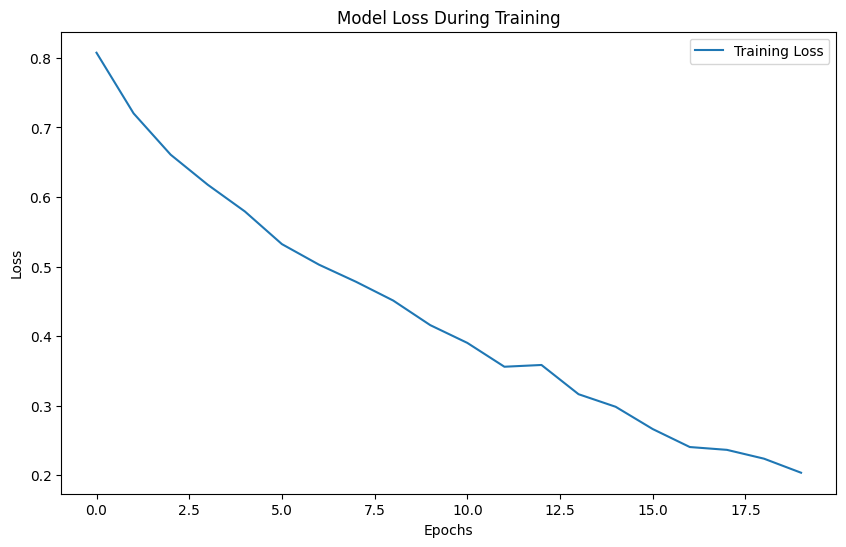

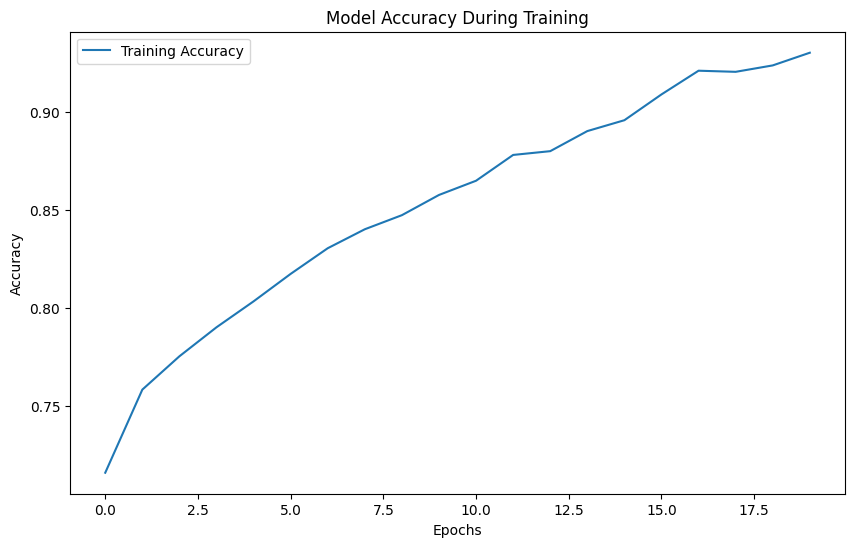

In [19]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(ThisModel.history['loss'], label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(ThisModel.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step


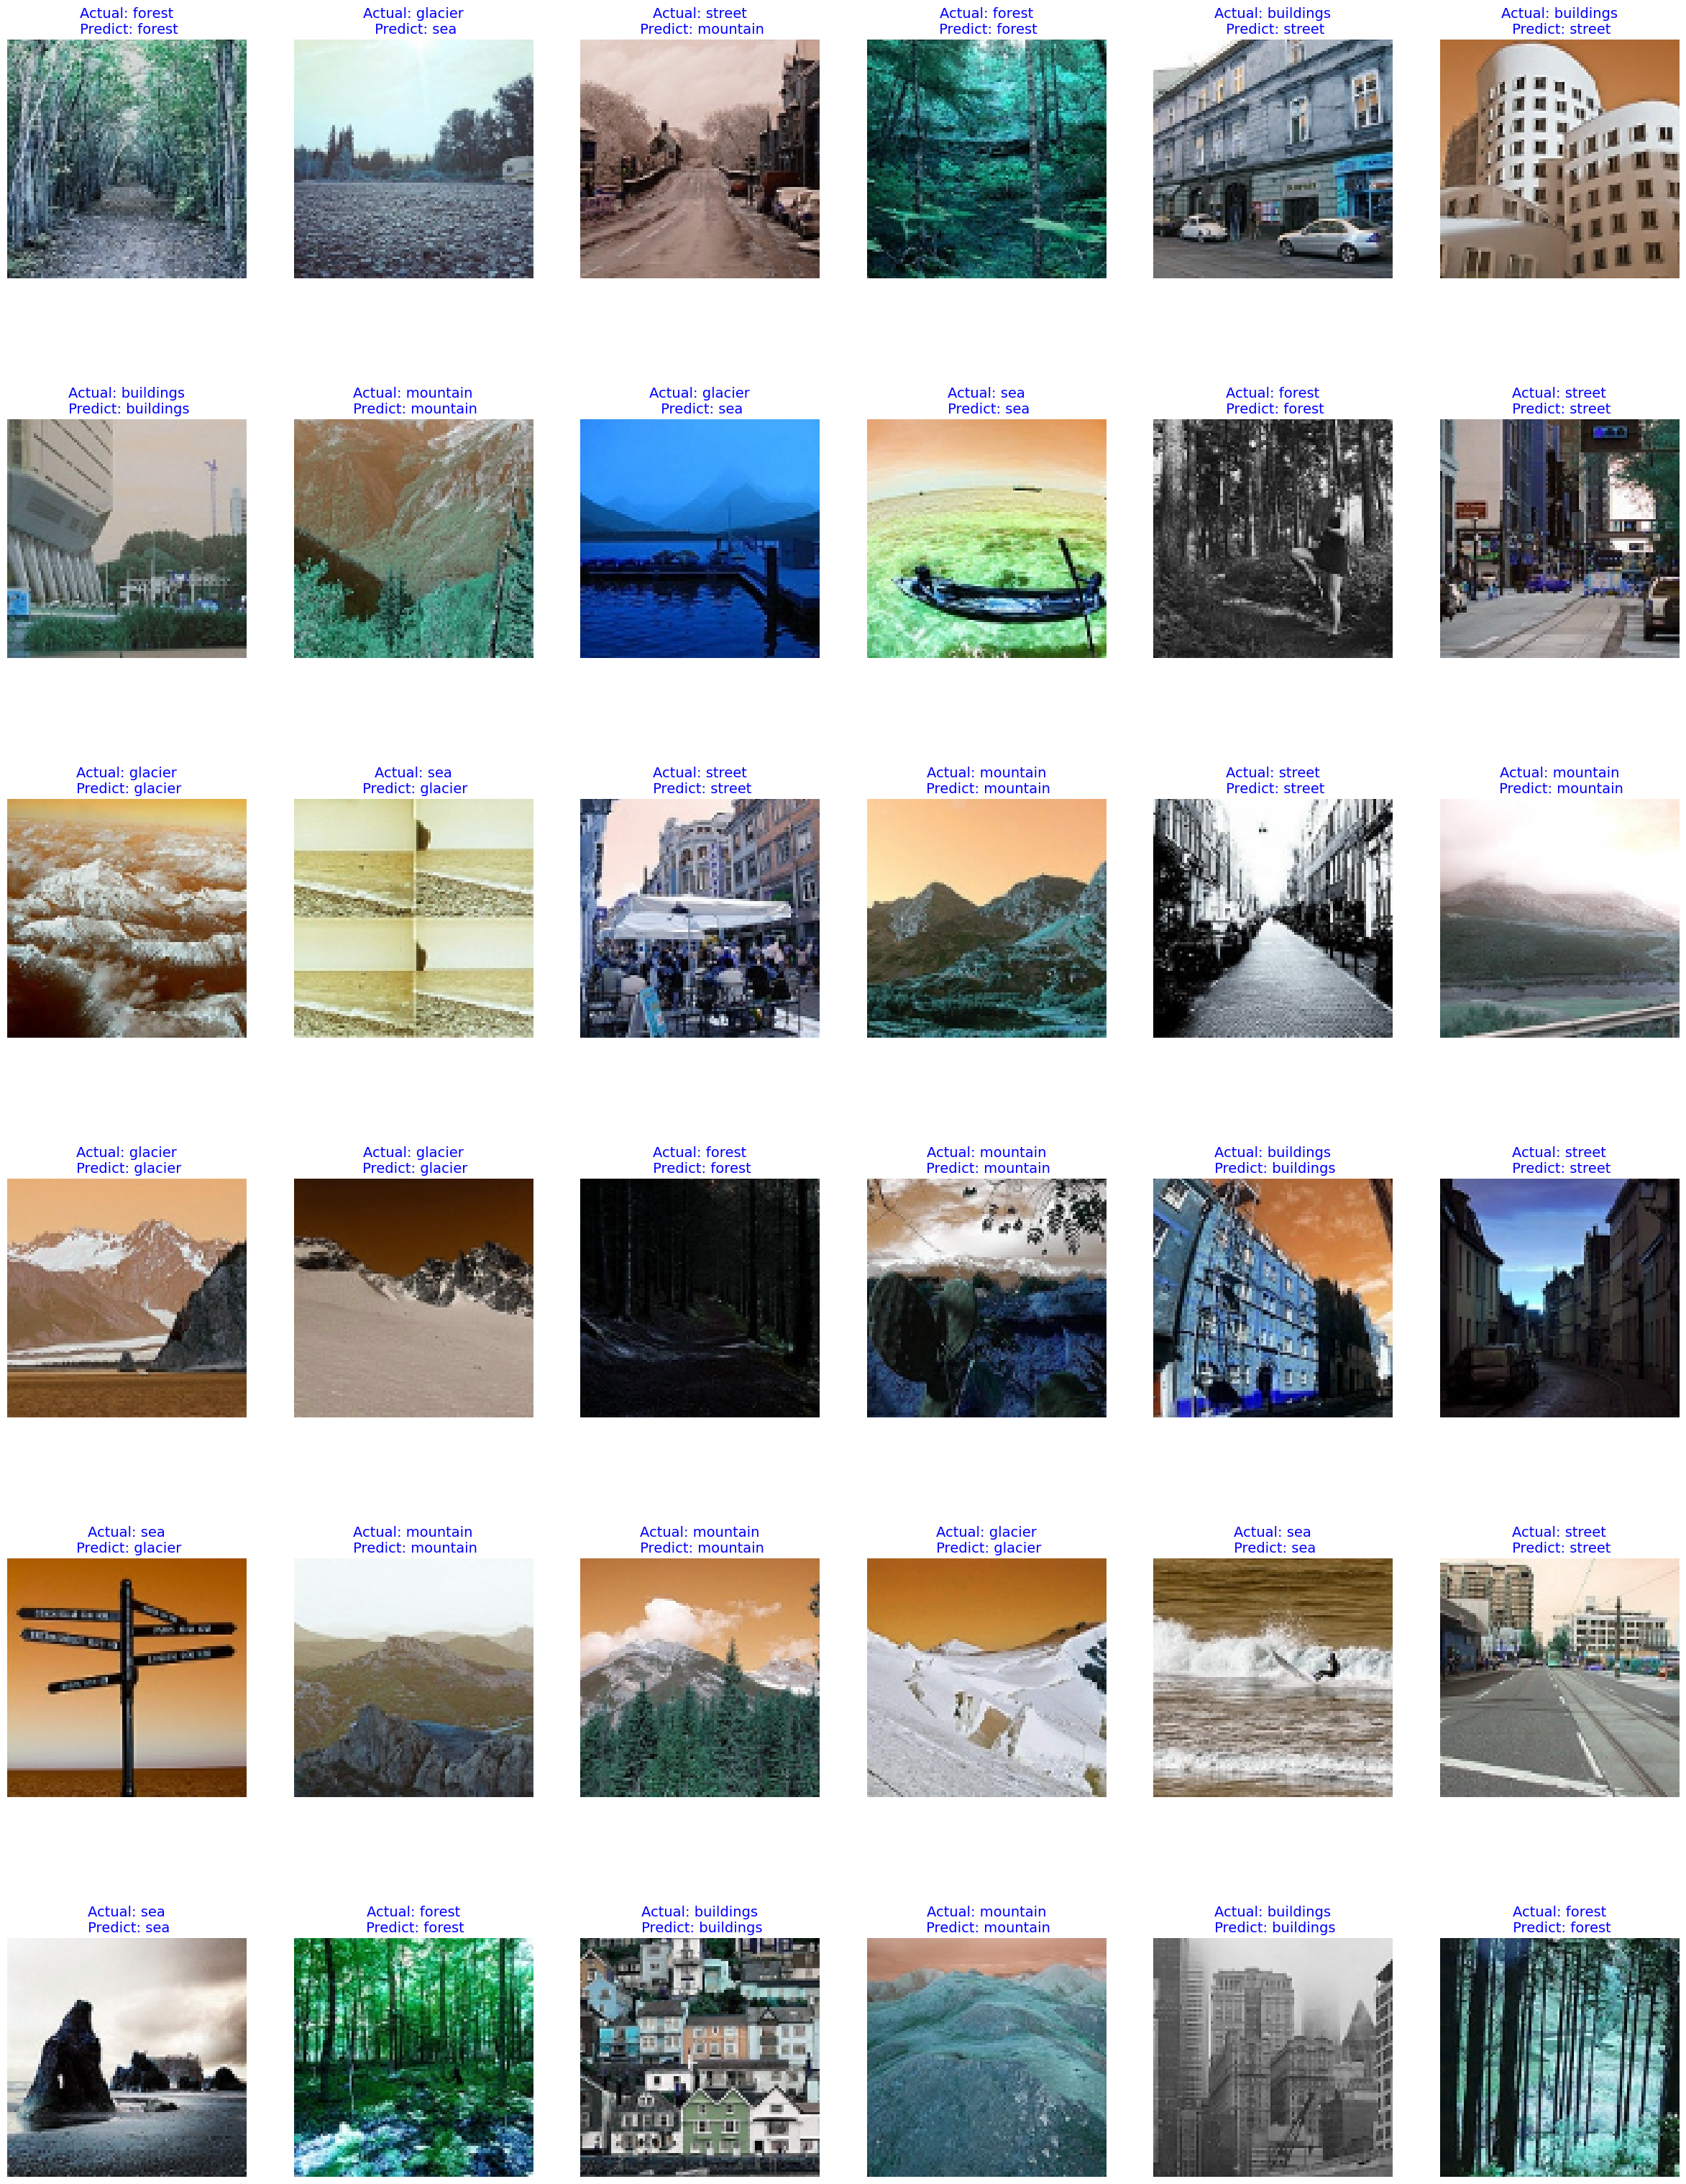

In [20]:
y_test_pred = KerasModel.predict(x_test)
plt.figure(figsize = (30, 40))
for n, i in enumerate(list(np.random.randint(0, len(x_test), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f'Actual: {getcode(y_test[i])}\n Predict: {getcode(np.argmax(y_test_pred[i]))}', fontdict = {'fontsize': 14, 'color': 'blue'})

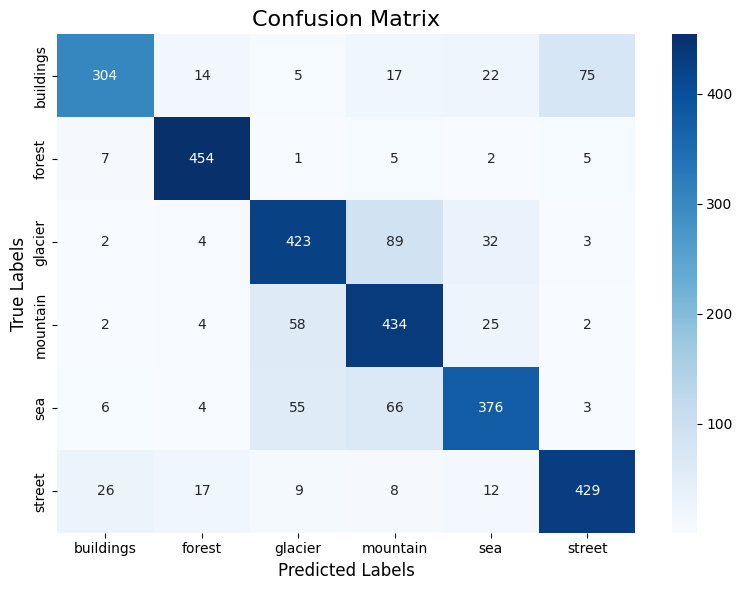

In [22]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))  
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.tight_layout()
    plt.show()
class_names = ['buildings','forest','glacier','mountain','sea','street' ]   
pred_labels = np.argmax(y_test_pred, axis=1)  
plot_confusion_matrix(y_test, pred_labels, class_names)